In [1]:
from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq, ifft

import matplotlib.pyplot as plt
import numpy as np

freq, x = wavfile.read('Track1.wav')

N = 32768
over = 0.25
resolution = float(freq) / N
notes = []
centres = []
notes.append(220)
centres.append(round(notes[0] / resolution + 0.5))

for i in range(1,60):
	notes.append(notes[i-1] * pow(2,(1.0/12)))
	centres.append(round(notes[i] / resolution + 0.5))

print(notes)
print(centres)

[220, 233.08188075904496, 246.94165062806206, 261.6255653005987, 277.18263097687213, 293.66476791740763, 311.126983722081, 329.62755691287003, 349.228231433004, 369.9944227116345, 391.99543598174944, 415.3046975799453, 440.00000000000017, 466.1637615180901, 493.8833012561243, 523.2511306011975, 554.3652619537444, 587.3295358348154, 622.2539674441621, 659.2551138257402, 698.4564628660081, 739.9888454232691, 783.990871963499, 830.6093951598907, 880.0000000000005, 932.3275230361803, 987.7666025122488, 1046.5022612023952, 1108.7305239074892, 1174.6590716696312, 1244.5079348883248, 1318.510227651481, 1396.912925732017, 1479.9776908465392, 1567.981743926999, 1661.2187903197823, 1760.000000000002, 1864.655046072362, 1975.533205024499, 2093.0045224047917, 2217.46104781498, 2349.3181433392638, 2489.015869776651, 2637.0204553029635, 2793.8258514640356, 2959.95538169308, 3135.9634878539996, 3322.437580639567, 3520.0000000000064, 3729.3100921447262, 3951.0664100490003, 4186.009044809586, 4434.9220

In [2]:
lefts = []
rights = []
for i in range(1,59):
	lefts.append(int((centres[i-1] + centres[i]) / 2))
	rights.append(int((centres[i+1] + centres[i]) / 2))
print(lefts)
print(rights)

[169, 179, 189, 200, 212, 225, 238, 252, 267, 283, 300, 318, 337, 357, 378, 400, 424, 450, 476, 504, 534, 566, 600, 636, 673, 713, 756, 801, 848, 899, 952, 1009, 1069, 1133, 1200, 1271, 1347, 1427, 1512, 1602, 1697, 1798, 1905, 2018, 2138, 2265, 2400, 2542, 2694, 2854, 3023, 3203, 3394, 3595, 3809, 4035, 4275, 4530]
[179, 189, 200, 212, 225, 238, 252, 267, 283, 300, 318, 337, 357, 378, 400, 424, 450, 476, 504, 534, 566, 600, 636, 673, 713, 756, 801, 848, 899, 952, 1009, 1069, 1133, 1200, 1271, 1347, 1427, 1512, 1602, 1697, 1798, 1905, 2018, 2138, 2265, 2400, 2542, 2694, 2854, 3023, 3203, 3394, 3595, 3809, 4035, 4275, 4530, 4799]


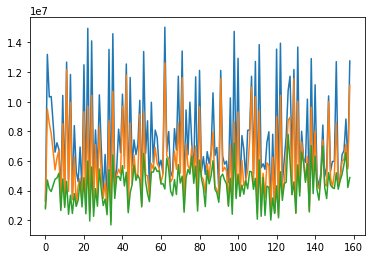

In [3]:
buf = []
bufs = []
numofcycle = 1
i = 0
cycle = 0

while i < len(x):
	if cycle >= N:
		if i >= len(x):
			break
		i -= int(N * over)
		bufs.append(buf)
		buf = []
		numofcycle += 1
		cycle = 0
		continue
	buf.append(x[i])
	i += 1
	cycle += 1

hammin = np.hamming(N)
periods = []
for period in bufs:
	period *= hammin;
	periods.append(abs(fft(period)[:N//2]))

pernum = 0
matrices = []
for period in periods:
	matrice_one = []
	for i in range(1,58):
		buf = 0
		for k in range(lefts[i],rights[i]+1):
			buf += period[k]
		matrice_one.append((1.0 / (rights[i] - lefts[i] + 1)) * buf)
	matrices.append(matrice_one)
	pernum += 1

maxes = []
for period in matrices:
	period.sort()
	maxes.append([period[-1], period[-2],period[-3]])


plt.plot(maxes)